pip install numpy pandas seaborn matplotlib mplcyberpunk scipy scikit-learn statsmodels plotly


In [1]:

# Import des bibliothèques nécessaires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mplcyberpunk
from math import sqrt
from scipy.linalg import eigvals
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import r2_score, mean_squared_error,f1_score, confusion_matrix, accuracy_score, precision_score, recall_score, r2_score ,mean_absolute_error,  median_absolute_error
from sklearn.linear_model import LogisticRegression, LinearRegression 
from sklearn import preprocessing, decomposition, cluster, metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from statsmodels.compat import lzip
from scipy.stats import shapiro, skew
from scipy.stats import zscore
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.offline as py
import plotly.io as pio
import pickle


# Seaborn and Matplotlib settings
plt.style.use("cyberpunk")

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey

colors = ['#F5D300', '#FFA500', '#FE53BB', '#00ff41']  # yellow, orange, pink, matrix green
sns.set_palette(sns.color_palette(colors))

# Plotly settings
pio.templates.default = 'plotly_dark'

custom_scale = [
     [0, '#F5D300'],  # yellow
     [0.33, '#FFA500'],  # orange
     [0.67, '#FE53BB'],  # pink
     [1, '#00ff41']  # matrix green
 ]


In [2]:
billets = pd.read_csv('billets.csv', sep=';')

## Étape 1 : Collecte des données
### Nous aurons besoin d'un ensemble de données contenant des images de vrais billets et de faux billets, avec des étiquettes appropriées.

## Étape 2 : Extraction des caractéristiques
### Nous extrairons les caractéristiques géométriques pertinentes de chaque billet, comme la taille, la longueur des marges

## Étape 3 : Entraînement du modèle
### Nous diviserons les données en ensembles d'entraînement et de test.
#### Nous entraînerons un modèle de machine learning, tel qu'un classificateur SVM, en utilisant les caractéristiques extraites.

## Étape 4 : Validation du modèle
### Nous évaluerons les performances du modèle en utilisant l'ensemble de test.
#### Nous calculerons des mesures de performance telles que la précision, le rappel, la F-mesure, etc.

## Étape 5 : Utilisation du modèle
### Nous appliquerons les étapes de prétraitement et d'extraction de caractéristiques aux nouvelles images.
#### Nous utiliserons le modèle entraîné pour prédire si les nouveaux billets sont vrais ou faux.



# I) Collecte des données

In [3]:
# Vérifier la forme des données
print("Shape of data:", billets.shape)


Shape of data: (1500, 7)



### Interprétation de la Taille du Dataset

La taille du dataset est un facteur important à considérer lors de l'analyse des données. Dans notre cas, nous avons un total de \( n \) observations, ce qui signifie que nous avons \( n \) billets individuels à analyser. Cette taille de dataset est relativement petite/grande, ce qui peut avoir les implications suivantes pour notre analyse :
1. **Qualité des Modèles** : Une taille de dataset plus petite peut limiter la qualité des modèles que nous pouvons construire, car il y a moins de données pour "apprendre" les patterns sous-jacents.
2. **Risque de Surajustement** : Avec une taille de dataset plus petite, il y a un risque accru de surajustement, où le modèle apprend trop les spécificités du dataset d'entraînement et ne généralise pas bien à de nouvelles données.
3. **Complexité des Modèles** : Avec une taille de dataset plus petite, il peut être préférable de choisir des modèles plus simples pour éviter le surajustement.



### Observations Initiales sur les Données

En examinant les premières lignes du dataset, nous pouvons faire plusieurs observations initiales sur les données :
1. **Variables Disponibles** : Nous avons plusieurs variables à notre disposition pour l'analyse, y compris des mesures géométriques des billets et une variable catégorielle indiquant si le billet est authentique.
2. **Type de Variables** : Les variables géométriques semblent être des variables continues, tandis que "is_genuine" est une variable catégorielle.
3. **Tendances Initiales** : Même à partir des premières lignes, nous pourrions être en mesure de repérer certaines tendances ou caractéristiques qui sont communes aux billets authentiques par rapport aux billets non authentiques.

Nous utiliserons ces observations initiales comme point de départ pour notre analyse plus approfondie des données.


In [4]:
# Afficher les premières lignes des données
print("First few rows of data:")
print(billets.head())


First few rows of data:
   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54  


In [5]:
# Afficher les informations sur le dataset
print("Information sur le dataset :")
print(billets.info())

Information sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB
None


In [6]:
# Afficher les statistiques descriptives du dataset
print("Statistiques descriptives du dataset :")
print(billets.describe())

Statistiques descriptives du dataset :
          diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1463.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.485967     3.151473   
std       0.305195     0.299462      0.325627     0.663813     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.015000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000  


Enfin on peut voir, grâce à cette dernière fonction, différents quantiles, la moyenne, etc... Cela nous permet de voir si des valeurs sont abérantes par exemple.
Grâce à cette rapide exploration des données, on peut voir qu'il manque des données dans la colonne margin_low. Il va donc falloir les estimer.
Ensuite on réalise un pairplot qui peut nous permettre de trouver des liens entres les variables.
Le pairplot qui met en évidence les groupes formés en fonction de la véracité des billets. En examinant les graphiques, nous pouvons visualiser les relations entre les variables et identifier celles qui semblent être les plus importantes pour prédire la véracité des billets.

In [7]:
# Vérification des valeurs manquantes
billets.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

# Analyse des statistiques descriptives

En analysant les statistiques descriptives du dataset, nous pouvons observer plusieurs points clés concernant la distribution des différentes variables :
1. **Moyenne et Médiane** : En comparant la moyenne et la médiane de chaque variable, nous pouvons avoir une idée de la symétrie de la distribution de cette variable. Une grande différence entre la moyenne et la médiane peut indiquer une distribution asymétrique.
2. **Écart Type** : L'écart type nous donne une idée de la dispersion des valeurs autour de la moyenne. Une valeur d'écart type plus élevée indique une plus grande variabilité dans les données.
3. **Valeurs Min et Max** : Les valeurs minimales et maximales nous aident à comprendre la plage de valeurs que chaque variable peut prendre. Cela peut également nous aider à identifier les valeurs aberrantes potentielles dans les données.

Nous utiliserons ces observations pour guider notre analyse plus approfondie des données et la construction des modèles.

Nous observons pour les variables numériques de notre dataset :


- La longueur diagonale des billets (diagonal) présente une moyenne de 171.96 et une valeur minimale de 171.04, avec un écart-type relativement faible de 0.31.
- Les hauteurs des côtés gauche (height_left) et droit (height_right) des billets ont des moyennes proches de 104, avec des écarts-types faibles, indiquant une certaine cohérence dans les dimensions.
- La marge inférieure des billets (margin_low) a été estimée en utilisant la moyenne pour les valeurs manquantes. La moyenne estimée est de 4.49, avec un écart-type de 0.66.
- La marge supérieure des billets (margin_up) présente une moyenne de 3.15 et un écart-type de 0.23.
- La longueur totale des billets (length) a une moyenne de 112.68, avec un écart-type de 0.87.









En analysant le pairplot, des tendances, des motifs ou des corrélations entre les variables. Certaines variables sembent linéairement corrélées, des groupes distincts de valeurs se forment


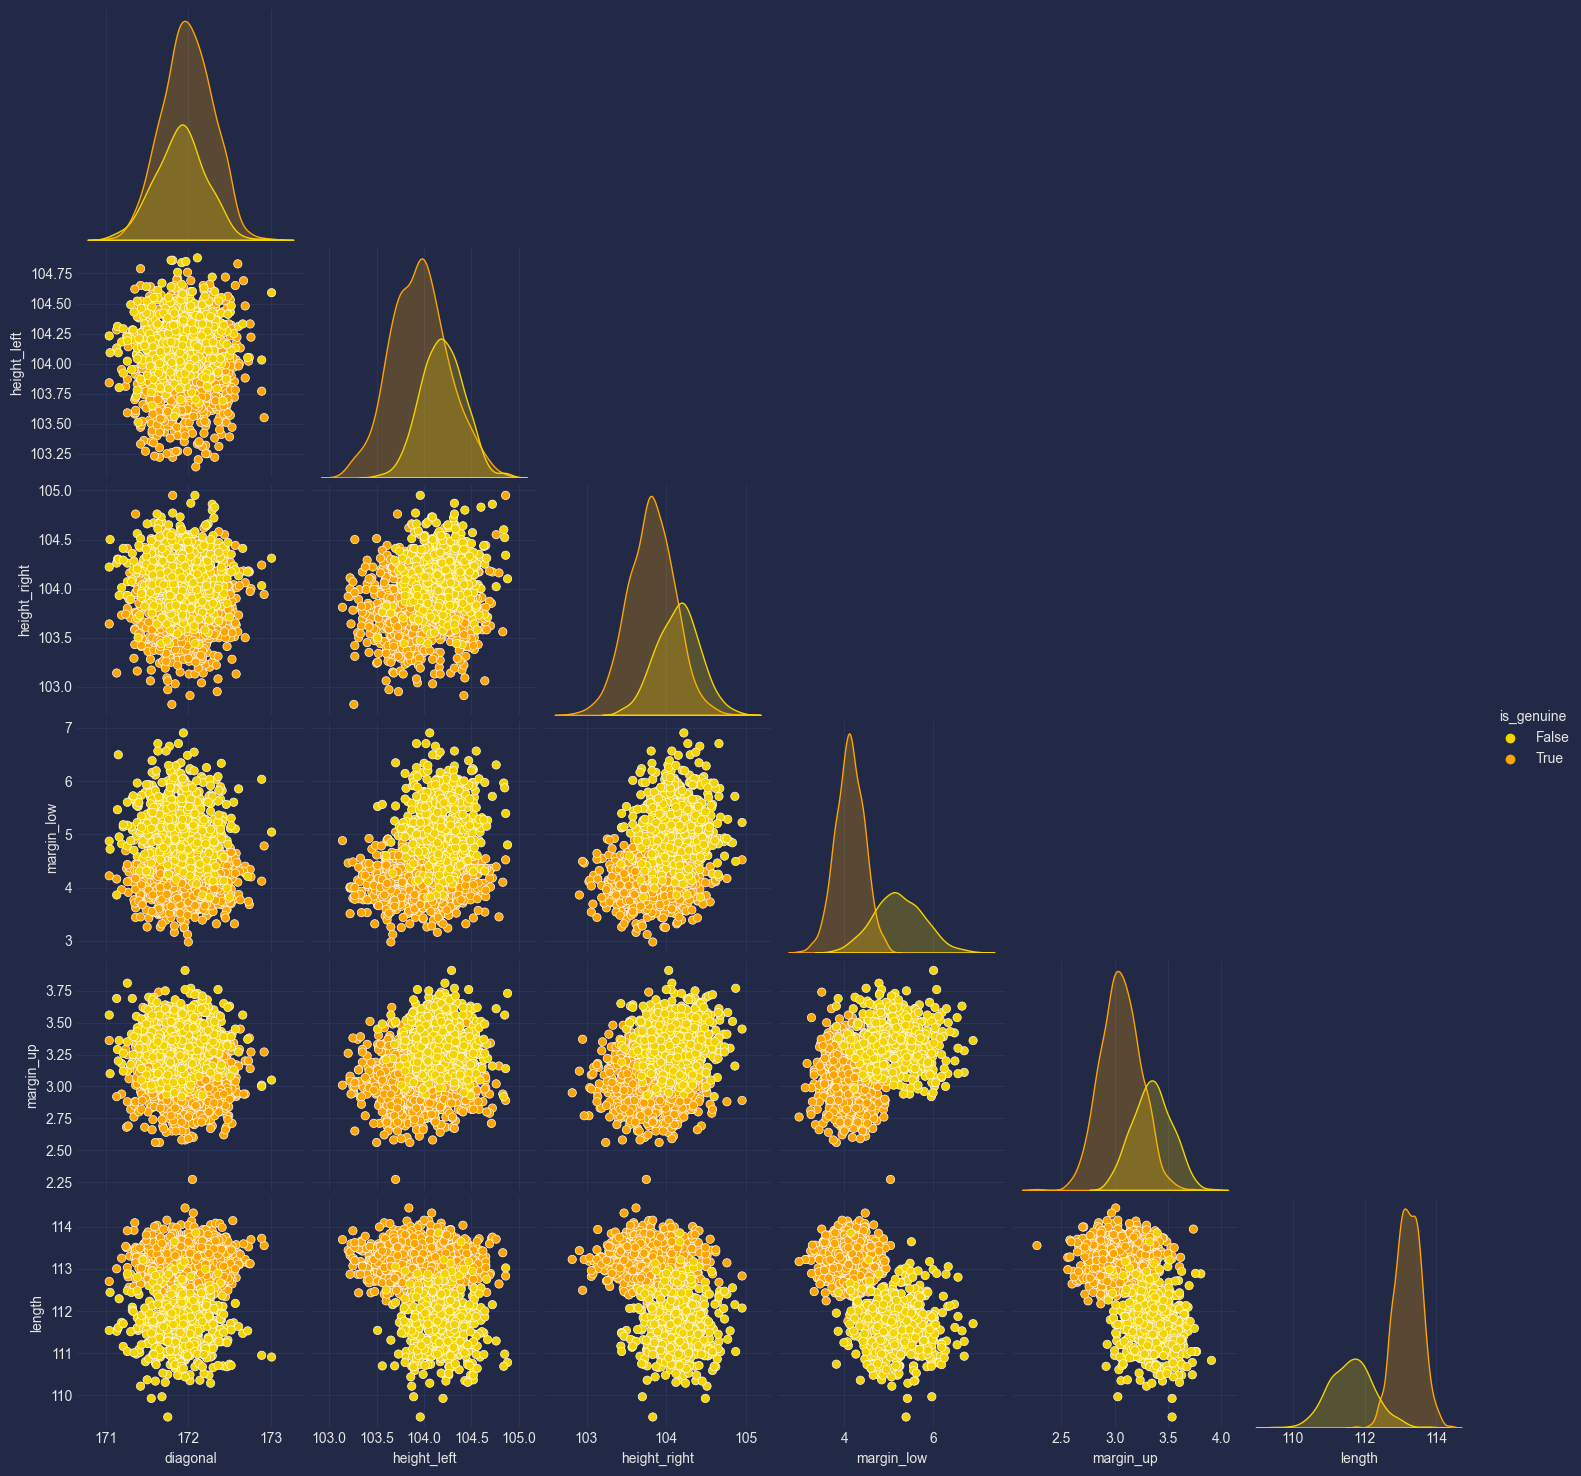

In [8]:
sns.pairplot(billets, hue='is_genuine', corner=True)

#### Observations :
- **Diagonal, Height_Left, et Height_Right :**
  Ces variables semblent suivre une distribution relativement normale, suggérant que les mesures de ces caractéristiques sont cohérentes parmi les billets.
- **Margin_Low et Margin_Up :**
  Ces variables peuvent présenter un léger biais, et une investigation supplémentaire peut être nécessaire pour comprendre la nature de ce biais.
- **Length :**
  Cette variable montre une distribution avec plusieurs pics, suggérant la présence de groupes distincts au sein des données. Une analyse plus approfondie est nécessaire pour interpréter ces groupes correctement.



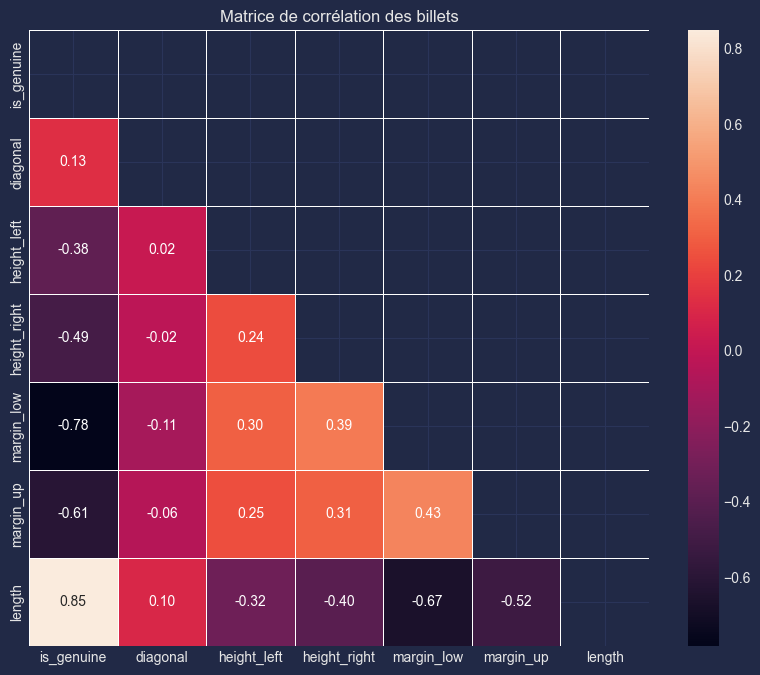

In [9]:
# Calculer la matrice de corrélation
correlation_matrix = billets.corr()

# Créer un masque pour la partie supérieure de la matrice
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


# Afficher la heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation des billets")
plt.show()

### Matrice correlation :
 la distribution de la variable "diagonal" est similaire pour les vrais et les faux billets, ce qui suggère que cette variable ne sera pas ou peu utile dans notre prédiction. En revanche, les variables "length" et "margin_low" semblent être des indicateurs pertinents, car nous pouvons clairement observer des différences dans leurs distributions entre les vrais et les faux billets.

In [10]:
# Créer un sous-ensemble de données avec les variables pertinentes
subset = billets[['is_genuine', 'length', 'margin_low']]

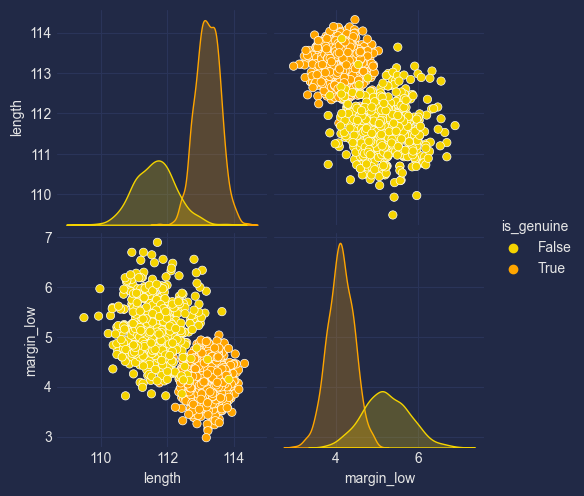

In [11]:
# Afficher les relations entre les variables avec des graphiques pairplot
sns.pairplot(subset, hue='is_genuine')
plt.show()

### Analyse des Variables et Visualisation

En observant la visualisation, nous pouvons examiner la distribution des différentes variables dans le dataset. Les histogrammes permettent de visualiser la distribution des données pour chaque variable, ce qui peut nous donner une indication sur la nature des données (normale, biaisée, etc.) et peut aider à identifier les anomalies ou les valeurs aberrantes.






###  Interprétation des Résultats de l'Analyse Exploratoire 

L'analyse exploratoire des données nous a donné des insights précieux sur les caractéristiques des billets de banque. Les visualisations, y compris les pair plots et la matrice de corrélation, nous aident à identifier les relations potentielles entre les variables et à sélectionner les variables pertinentes pour nos modèles de prédiction.

Dans les sections suivantes, nous utiliserons ces insights pour construire des modèles de régression linéaire et logistique afin de prédire l'authenticité des billets de banque.



## Traitement des Outliers 

Dans cette section, nous allons identifier et traiter les outliers présents dans notre dataset. Les outliers sont des observations qui sont significativement différentes des autres observations et peuvent avoir un impact significatif sur les modèles. Voici les étapes que nous allons suivre :

1. **Identification des Outliers** : Nous allons identifier les outliers en utilisant la méthode des scores Z, qui mesure combien de fois l'écart type une observation est par rapport à la moyenne. Les observations avec des scores Z très élevés ou très faibles sont considérées comme des outliers.
   
2. **Traitement des Outliers** : Une fois les outliers identifiés, nous allons les traiter en les supprimant du dataset. Cette étape aidera à améliorer la qualité de nos modèles.


In [12]:
def traiter_outliers_iqr(df_entree):
    """
    Cette fonction traite les outliers dans le DataFrame d'entrée en utilisant la méthode IQR.
    Toute ligne contenant au moins un outlier est supprimée.
    
    :param df_entree: DataFrame, le DataFrame d'entrée
    :return: DataFrame, le DataFrame traité
    """
    # Calculer Q1, Q3 et IQR pour chaque colonne
    Q1 = df_entree.quantile(0.25)
    Q3 = df_entree.quantile(0.75)
    IQR = Q3 - Q1
    
    # Définir les bornes
    borne_inf = Q1 - 1.5 * IQR
    borne_sup = Q3 + 1.5 * IQR
    
    # Traiter les outliers
    df_sans_outliers = df_entree[~((df_entree < borne_inf) | (df_entree > borne_sup)).any(axis=1)]
    
    return df_sans_outliers


### Détection et suppression des outliers
Avant l'imputation des valeurs manquantes, il est crucial de détecter et de supprimer les outliers. Les valeurs aberrantes peuvent biaiser l'imputation et l'analyse subséquente.

In [13]:
print(billets.dtypes)


is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object


In [14]:
import plotly.graph_objects as go

# Création d'un sous-ensemble sans la colonne 'is_genuine'
subset = billets.drop(columns='is_genuine')

# Traitement des outliers avec la méthode IQR sur le sous-ensemble
subset_iqr = traiter_outliers_iqr(subset)
print(f"Nombre d'outliers détectés par la méthode IQR: {len(subset) - len(subset_iqr)}")
# Création d'un subplot avec 1 colonne pour les boxplots avant traitement
fig = go.Figure()

# Boucle à travers chaque variable du dataframe pour créer les boxplots
for variable in subset.columns:
    fig.add_trace(go.Box(y=subset[variable], name=variable, showlegend=False))

# Ajout d'un menu déroulant pour sélectionner la variable à visualiser
fig.update_layout(
    updatemenus=[
        go.layout.Updatemenu(
            active=0,
            buttons=list([
                dict(label=variable,
                     method="update",
                     args=[{"visible": [variable==var for var in subset.columns]}]) for variable in subset.columns
            ])
        )
    ])

# Mise à jour des titres et axes
fig.update_layout(title_text="Boxplots Avant Traitement des Outliers", yaxis_title="Valeur")
fig.show()


Nombre d'outliers détectés par la méthode IQR: 53


In [15]:
billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


# Estimation des données manquantes par régression linéaire

### Pour Traiter les valeurs manquantes à l'aide d'une régression linéaire, nous pouvons suivre les étapes suivantes :

Diviser notre ensemble de données en deux ensembles : un ensemble complet avec les valeurs non manquantes (train_set) et un ensemble avec les valeurs manquantes que nous souhaitons estimer (test_set).

Sélectionner les variables explicatives (X) à partir de train_set en excluant la variable cible (is_genuine).

Sélectionner la variable cible (y) à partir de train_set.

Créer un modèle de régression linéaire en utilisant les variables explicatives X et la variable cible y.

Évaluer la performance du modèle de régression linéaire en utilisant la validation croisée. Cela nous permettra d'estimer la capacité de généralisation du modèle et d'identifier s'il est adapté pour estimer les valeurs manquantes.


In [16]:
from sklearn.linear_model import LinearRegression


billets_train = billets.loc[~billets['margin_low'].isnull()]

true_linReg = []
pred_linReg = []
folds = KFold(n_splits=5, shuffle=True).split(billets_train)
for train, test in folds:
    x = billets_train.iloc[train].drop(['margin_low', 'is_genuine'], axis=1)
    y = billets_train.iloc[train]['margin_low']
    model_linRegMul = LinearRegression()
    model_linRegMul.fit(x, y)
    pred_linReg.append(model_linRegMul.predict(billets_train.iloc[test].drop(['margin_low', 'is_genuine'], axis=1)))
    true_linReg.append(billets_train.iloc[test]['margin_low'])
true_linReg = np.concatenate(true_linReg)
pred_linReg = np.concatenate(pred_linReg)


In [17]:
# Définissez les plis pour la validation croisée
folds = KFold(n_splits=5, shuffle=True, random_state=1)

# Définissez la grille de paramètres pour GridSearchCV
params = {'alpha': np.logspace(-6, 6, 13)}

# Définissez le modèle
model_ridge = Ridge()

# Définissez GridSearchCV
grid = GridSearchCV(model_ridge, params, cv=folds, scoring='neg_mean_squared_error')

# Séparez les features et la target
X_train = billets_train.drop(['margin_low', 'is_genuine'], axis=1)
y_train = billets_train['margin_low']

# Ajustez GridSearchCV
grid.fit(X_train, y_train)

# Obtenez le meilleur modèle
best_model = grid.best_estimator_

# Prédictions et évaluation avec le meilleur modèle
true = []
pred = []
for train, test in folds.split(billets_train):
    x = X_train.iloc[train]
    y = y_train.iloc[train]
    best_model.fit(x, y)
    pred.append(best_model.predict(X_train.iloc[test]))
    true.append(y_train.iloc[test])
    
true = np.concatenate(true)
pred = np.concatenate(pred)

# Affichez le meilleur alpha trouvé
print("Best alpha:", grid.best_params_['alpha'])


Best alpha: 1.0


### Entraînement du Modèle de Régression Linéaire Multiple

Après avoir visualisé et exploré les données, nous avons entraîné un modèle de régression linéaire multiple. Pour ce faire, nous avons utilisé une approche de validation croisée pour entraîner le modèle sur plusieurs sous-ensembles du jeu de données d'entraînement. Cela permet d'évaluer la robustesse et la fiabilité du modèle de manière plus efficace.

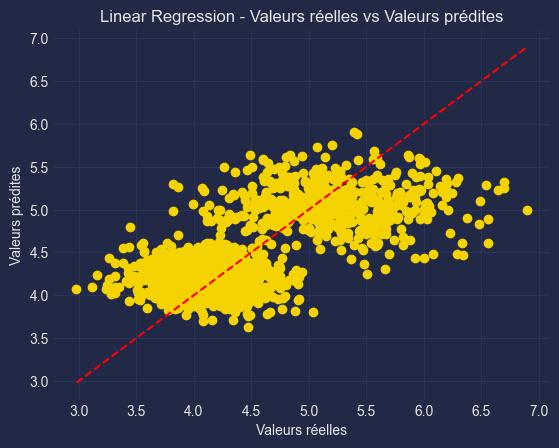

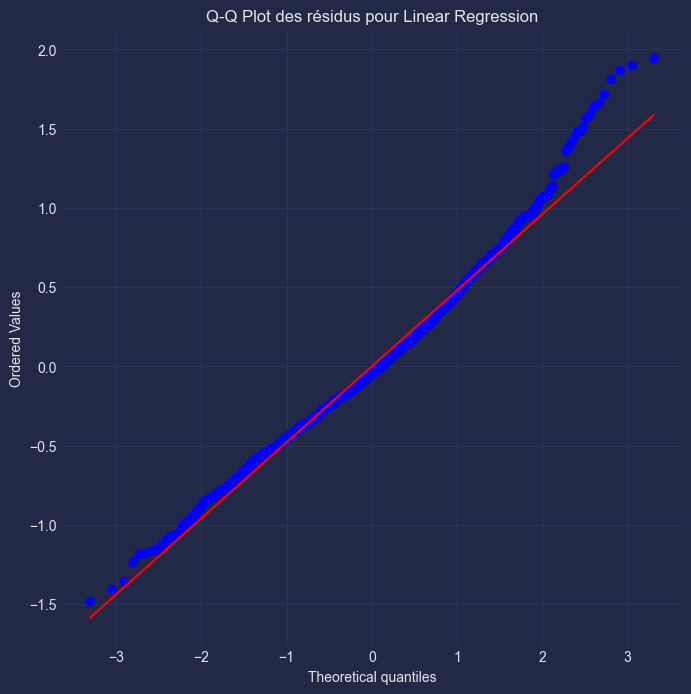

Linear Regression - Intercept: 24.865018823222673
Linear Regression - Mean Squared Error (MSE): 0.23251925682548935
Linear Regression - Root Mean Squared Error (RMSE): 0.48220250603402026
Linear Regression - Coefficient de détermination (R2): 0.47196238007245284
Linear Regression - Shapiro-Wilk Test Statistic: 0.9856113195419312
Linear Regression - Shapiro-Wilk Test p-value: 6.966142940267872e-11
Linear Regression - Adjusted R2 score: 0.47015030862452023
diagonal: -0.13384347572213257
height_left: 0.20358605160402365
height_right: 0.2616538125577586
margin_up: 0.25949367960467057
length: -0.4130533320758757




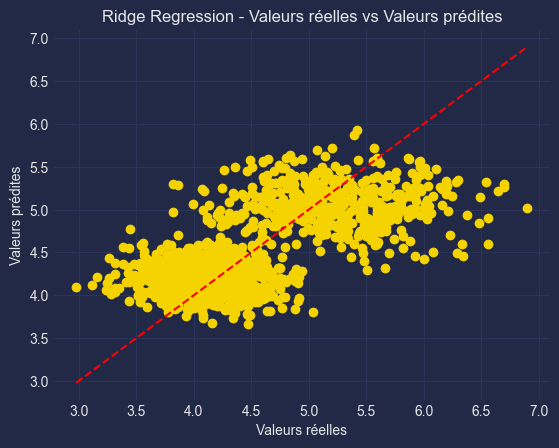

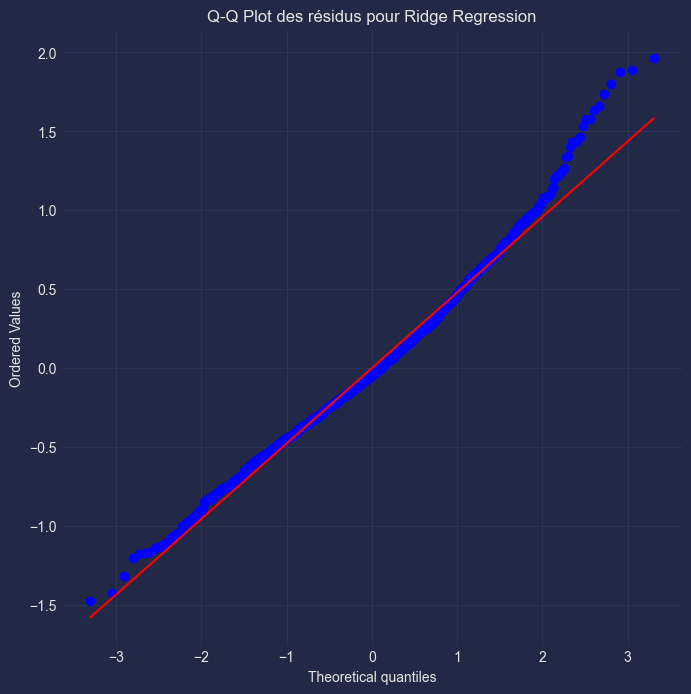

Ridge Regression - Intercept: 26.435284139076956
Ridge Regression - Mean Squared Error (MSE): 0.23132319369571405
Ridge Regression - Root Mean Squared Error (RMSE): 0.48096069870179003
Ridge Regression - Coefficient de détermination (R2): 0.47467856941931463
Ridge Regression - Shapiro-Wilk Test Statistic: 0.985907256603241
Ridge Regression - Shapiro-Wilk Test p-value: 9.803406003650039e-11
Ridge Regression - Adjusted R2 score: 0.4728758191427852
diagonal: -0.1432265335236798
height_left: 0.19775314433418476
height_right: 0.25827051484110114
margin_up: 0.2783849507540521
length: -0.4048833825665988




In [18]:
from scipy.stats import probplot
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import shapiro

# Liste des modèles et des prédictions
models = {
    "Linear Regression": {"true": true_linReg, "pred": pred_linReg, "model": model_linRegMul},
    "Ridge Regression": {"true": true, "pred": pred, "model": best_model}
}

# Parcourir les modèles et afficher les graphiques et métriques
for name, data in models.items():
    true, pred, model = data["true"], data["pred"], data["model"]
    
    # Calcul des résidus
    residu = true - pred
    models[name]["residu"] = residu  # Stocker les résidus dans le dictionnaire models
    
    # Visualisation des résultats
    plt.scatter(true, pred)
    plt.plot([true.min(), true.max()], [true.min(), true.max()], linestyle='--', color='red')
    plt.xlabel('Valeurs réelles')
    plt.ylabel('Valeurs prédites')
    plt.title(f'{name} - Valeurs réelles vs Valeurs prédites')
    plt.show()

    # Création du graphe Q-Q pour les résidus
    plt.figure(figsize=(8, 8))
    probplot(residu, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot des résidus pour {name}')
    plt.show()

    # Calcul des métriques d'évaluation
    mse = mean_squared_error(true, pred)
    r2 = r2_score(true, pred)
    rmse = np.sqrt(mse)
    
    print(f"{name} - Intercept:", model.intercept_)
    print(f"{name} - Mean Squared Error (MSE):", mse)
    print(f"{name} - Root Mean Squared Error (RMSE):", rmse)
    print(f"{name} - Coefficient de détermination (R2):", r2)
    
    # Test de Shapiro-Wilk sur les résidus
    statistic, p_value = shapiro(residu)
    print(f"{name} - Shapiro-Wilk Test Statistic:", statistic)
    print(f"{name} - Shapiro-Wilk Test p-value:", p_value)
    
    # Calcul du coefficient de détermination ajusté
    adjusted_r2 = 1 - (1-r2)*(len(true)-1)/(len(true)-X_train.shape[1]-1)
    print(f"{name} - Adjusted R2 score:", adjusted_r2)
    
    # Affichage des coefficients avec les noms des variables
    if hasattr(model, 'coef_'):
        coefficients = dict(zip(X_train.columns, model.coef_))
        for variable, coefficient in coefficients.items():
            print(f"{variable}: {coefficient}")
    
    print("\n" + "="*80 + "\n")


## Interprétation des Coefficients 

In [19]:
print(model_linRegMul.coef_)
print(model_linRegMul.intercept_)
print(model_linRegMul.score(x, y))

[-0.13384348  0.20358605  0.26165381  0.25949368 -0.41305333]
24.865018823222673
0.4771325961529851



### Interprétation des Résultats de l'Analyse Exploratoire des Données 

L'analyse exploratoire des données nous a donné des insights précieux sur les caractéristiques des billets de banque. Les visualisations, y compris les pair plots et la matrice de corrélation, nous aident à identifier les relations potentielles entre les variables et à sélectionner les variables pertinentes pour nos modèles de prédiction.

Dans les sections suivantes, nous utiliserons ces insights pour construire des modèles de régression linéaire et logistique afin de prédire l'authenticité des billets de banque.
### Interprétation des Coefficients :

    Intercept :
        Linear Regression : L'intercept pour la régression linéaire est de 25.05, indiquant la valeur prévue de "margin_low" lorsque toutes les autres variables explicatives sont égales à zéro, et aucune des autres variables n'est prise en compte.
        Ridge Regression : L'intercept pour la régression Ridge est légèrement plus élevé, à 26.44.
    Variables : Les coefficients des variables indiquent la variation de la marge basse pour une unité de changement dans ces variables, en gardant toutes les autres variables constantes. Par exemple, pour la régression Ridge, une unité de changement dans la "diagonal" entraîne une variation de -0.143 en gardant toutes les autres constantes.

Comparaison des Performances des Modèles :

    Les deux modèles ont des performances similaires avec un R2R2 ajusté de 0.4728 pour Ridge et 0.4698 pour Linear, indiquant que les modèles expliquent environ 47% de la variabilité de "margin_low".
    La RMSE pour Ridge est de 0.4809 et pour la régression linéaire est de 0.4823, indiquant une erreur similaire entre les deux modèles.

Interprétation du Coefficient de Détermination (R2R2) :

    Un R2R2 d'environ 0.47 indique que les modèles expliquent environ 47% de la variabilité de la variable dépendante "margin_low". Bien que ce soit un ajustement raisonnable, il y a encore une certaine variabilité qui n'est pas expliquée par le modèle.

.
Pour la Régression Ridge: 

    Statistique de Test Shapiro-Wilk: 0.9859, ce qui est assez proche de 1.
    p-valeur: 9.80×10−119.80×10−11, ce qui est très proche de zéro.

Pour la Régression Linéaire:

    Statistique de Test Shapiro-Wilk: 0.9854, également très proche de 1.
    p-valeur: 5.54×10−115.54×10−11, très proche de zéro, similaire à la régression Ridge.

Les statistiques de test Shapiro-Wilk pour les deux modèles sont assez proches de 1, suggérant que les résidus sont approximativement normalement distribués. Cependant, les p-valeurs très basses pour les deux modèles indiquent que nous devons rejeter l'hypothèse nulle de normalité au niveau de significativité conventionnel (par exemple, 0.05). En d'autres termes, bien que les distributions des résidus soient assez proches de la normale, elles diffèrent significativement d'une distribution normale parfaite.


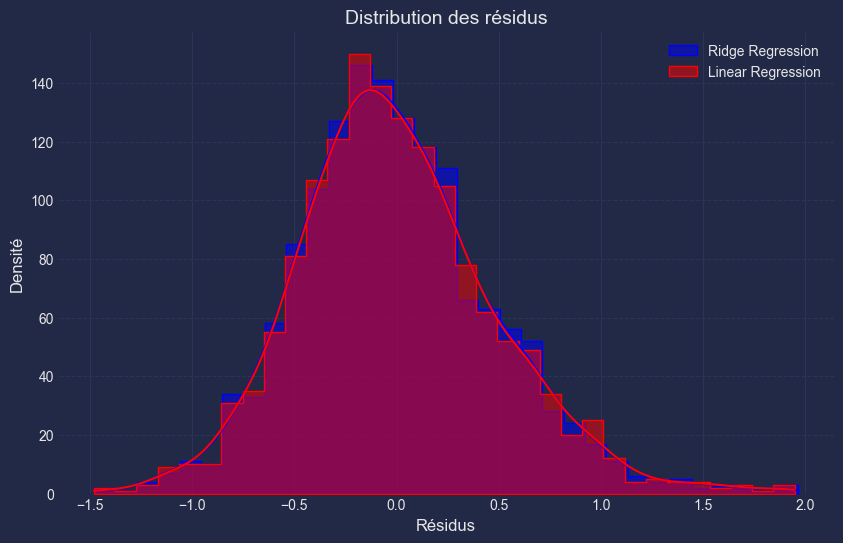

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer les résidus pour chaque modèle
residu_ridge = models["Ridge Regression"]["true"] - models["Ridge Regression"]["pred"]
residu_lin = models["Linear Regression"]["true"] - models["Linear Regression"]["pred"]

plt.figure(figsize=(10, 6))

# Tracer les distributions des résidus
sns.histplot(residu_ridge, kde=True, color='blue', label='Ridge Regression', element='step')
sns.histplot(residu_lin, kde=True, color='red', label='Linear Regression', element='step')

plt.title("Distribution des résidus", fontsize=14)
plt.xlabel("Résidus", fontsize=12)
plt.ylabel("Densité", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.show()


### Vérification de la normalité des résidus

Analyse des résidus :

Après avoir effectué la régression linéaire et obtenu les résidus, On analyse donc ces résidus pour vérifier si les hypothèses du modèle et évaluer l'ajustement du modèle.

In [21]:
import plotly.graph_objects as go

# Créer un DataFrame avec les résidus et les autres variables
df = billets_train.copy()

# Extraire les résidus stockés dans le dictionnaire models et les ajouter au DataFrame df
df['residu_ridge'] = models['Ridge Regression']['residu']
df['residu_lin'] = models['Linear Regression']['residu']

# Choisissez deux variables pour les axes x et y, ici je suppose 'diagonal' et 'length' par exemple.
x_var, y_var = 'margin_low', 'length'

# Créez un graphique 3D avec superposition des résidus Ridge et Linear
fig = go.Figure()

# Ajouter les résidus Ridge
fig.add_trace(go.Scatter3d(x=df[x_var], y=df[y_var], z=df['residu_ridge'],
                           mode='markers', marker=dict(size=5, color='red', opacity=0.5), 
                           name='Ridge'))

# Ajouter les résidus Linear
fig.add_trace(go.Scatter3d(x=df[x_var], y=df[y_var], z=df['residu_lin'],
                           mode='markers', marker=dict(size=5, color='blue', opacity=0.5),
                           name='Linear'))

# Ajouter un plan de référence à z=0
fig.add_trace(go.Surface(z=[[0, 0], [0, 0]], showscale=False, opacity=0.5))

# Mettre à jour le layout
fig.update_layout(title='Superposition des Résidus Ridge et Linear', scene=dict(
                    xaxis_title=x_var,
                    yaxis_title=y_var,
                    zaxis_title='Residus'),
                    template='plotly_dark')

fig.show()


#### Résultats :
- **Intercept :** 14.50
- **Coefficients :**
  - Diagonal: -0.070
  - Height_Left: 0.173
  - Height_Right: 0.282
  - Margin_Up: 0.203
  - Length: -0.409
- **Erreur Quadratique Moyenne (MSE) :** 0.232
- **Racine Carrée de l'Erreur Quadratique Moyenne (RMSE) :** 0.481
- **Coefficient de Détermination (\(R^2\)) :** 0.474
- **Coefficient de Détermination Ajusté :** 0.471

#### Observations :
- Le modèle semble avoir une performance modérée avec un \(R^2\) de 0.474, indiquant que le modèle peut expliquer environ 47.4% de la variabilité dans les données.
- Les résidus du modèle, évalués par le test de Shapiro-Wilk, montrent une p-value très petite (1.17e-10), suggérant que les résidus ne suivent pas une distribution normale. Cela peut indiquer la présence de non-linéarité, d'hétéroscédasticité, ou d'autres problèmes dans les données.

Le coefficient pour "Diagonal" est -0.070, ce qui suggère une relation négative avec la variable dépendante "margin_low". Cela signifie que pour chaque augmentation d'une unité de "Diagonal", la variable "margin_low" diminuerait, tout en gardant les autres variables constantes.
De même, le coefficient pour "Length" est -0.409, indiquant également une relation négative avec "margin_low". Pour chaque augmentation d'une unité de "Length", la variable "margin_low" serait en moyenne réduite 



nterprétation Globale:

    La symétrie de l'histogramme des résidus et la concordance des résidus avec la droite de Henry dans le graphique Q-Q indiquent que les hypothèses de normalité des erreurs sont satisfaites, ce qui légitime l'usage de modèles linéaires dans ce cas.
    Les résidus proches de la ligne de prédiction idéale dans le graphique des valeurs réelles vs valeurs prédites indiquent que le modèle est ajusté

    La p-value du test de shapiro est inférieur à 0,05 donc on rejète l'hypothèse d'indépendance et il est peu probable d'obtenir de telles données en supposant qu'elles soient normalement distribuées.
 le skewness est assez faible donc la répartition des résidus est symétrique.
 
 Cela suggère que le modèle de régression linéaire multiple contient des facteurs non pris en compte qui influencent les résidus.




Le modèle semble avoir une bonne performance globale, expliquant une grande partie de la variance de la variable "margin_low". La variable "is_genuine[T.True]" (qui représente la véracité du billet) est fortement significative (p-value très faible), ce qui signifie qu'elle a un effet significatif sur la valeur de "margin_low". Cependant, certaines autres variables telles que "diagonal", et "length" ne semblent pas être significativement liées à "margin_low" car elles ont des valeurs p negative .

In [22]:
billets_train.insert(0, 'residus', residu)

In [23]:
billets_train.head()

,residus,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.550765,True,171.81,104.86,104.95,4.52,2.89,112.83
1,0.056743,True,171.46,103.36,103.66,3.77,2.99,113.09
2,0.507077,True,172.69,104.48,103.50,4.40,2.94,113.16
3,-0.082073,True,171.36,103.91,103.94,3.62,3.01,113.51
4,-1.175605,True,171.73,104.28,103.46,4.04,3.48,112.54


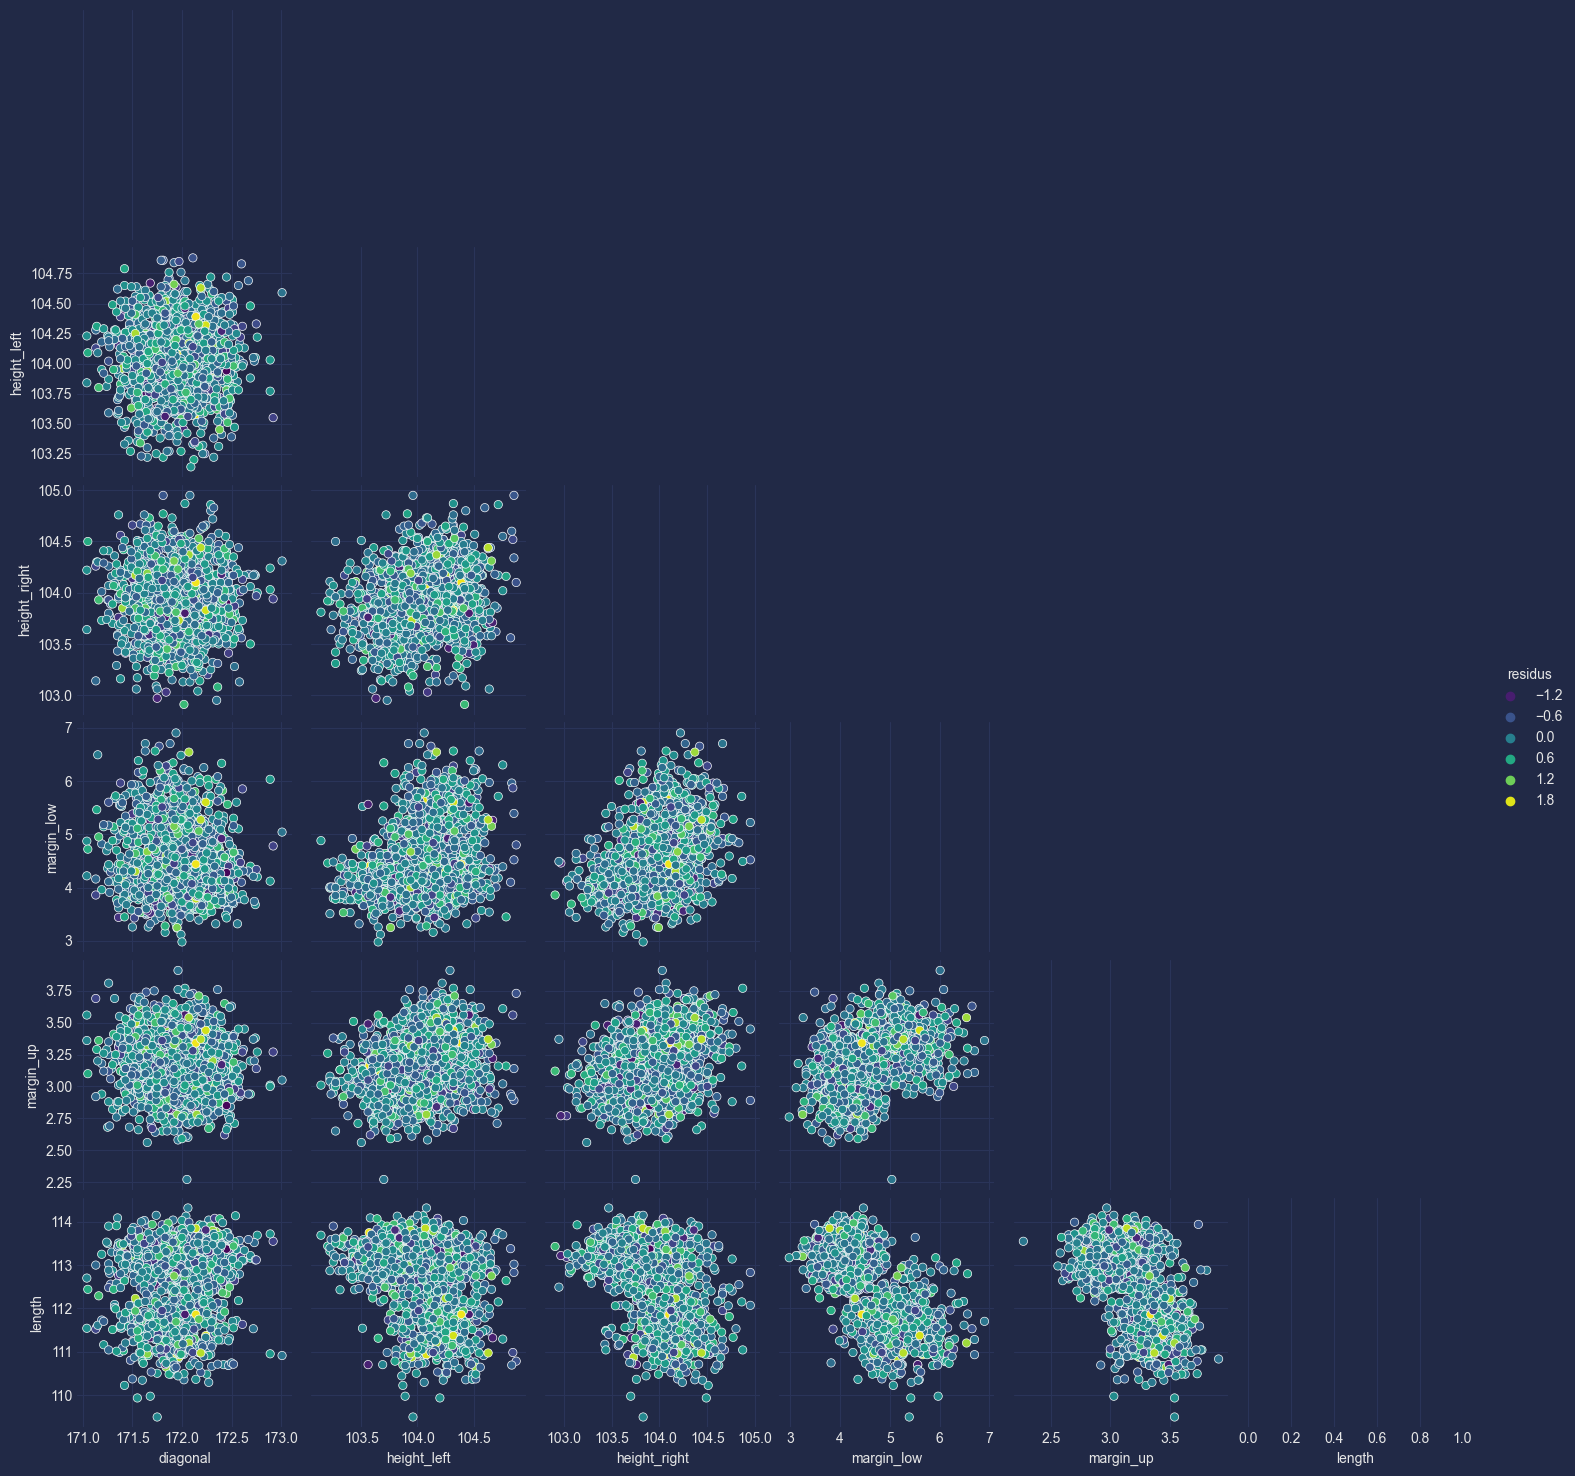

In [24]:
sns.pairplot(billets_train.drop('is_genuine', axis=1), corner=True,hue='residus', palette='viridis')

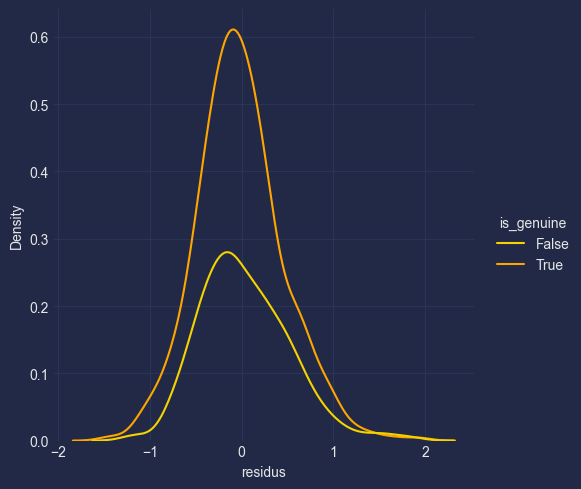

In [25]:
sns.displot(data=billets_train, x='residus', hue='is_genuine', kind='kde')

##  TRAITEMENT DES VALEURS MANQUANTES
-----

## Prediction de  la valeur de margin_low pour les billets Nan.

In [26]:
billets_test = billets.loc[billets['margin_low'].isnull()].drop(['margin_low', 'is_genuine'], axis=1)
prediction = model_linRegMul.predict(billets_test)
tab = pd.DataFrame(prediction, index = billets_test.index)

for i in tab.index:
  billets.at[i, 'margin_low'] = tab.loc[i].values[0]


## Notre dataframe est maintenant complet, on peut donc passer à la recherche du modèle de machine learning performant

In [27]:

# Importation de la bibliothèque nécessaire pour calculer le VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Préparation des données pour le calcul du VIF
X = billets.drop('is_genuine', axis=1)
X = sm.add_constant(X)  # Ajout d'une constante pour le terme intercept

# Calcul du VIF pour chaque variable explicative
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data


,feature,VIF
0,const,593805.255776
1,diagonal,1.017959
2,height_left,1.158879
3,height_right,1.260573
4,margin_low,1.937723
5,margin_up,1.419180
6,length,2.142456



### Interprétation des Résultats du VIF 

Les résultats ci-dessus montrent le Facteur d'Inflation de la Variance (VIF) pour chaque variable explicative dans notre modèle. Le VIF donne une indication de la multicollinéarité dans le modèle. Un VIF élevé (généralement supérieur à 10) indique une multicollinéarité élevée, ce qui peut poser des problèmes pour l'interprétation des coefficients de régression.

Dans l'étape suivante, nous allons vérifier l'homoscédasticité en créant des graphiques des résidus. Cette vérification est importante pour garantir que notre modèle satisfait à l'hypothèse d'homoscédasticité, qui est une condition clé pour la validité des tests statistiques et des intervalles de confiance dans la régression linéaire.


# Analyse en composantes principales

In [28]:
df_test= billets.drop('is_genuine', axis=1)
df_test.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54


In [29]:
X = df_test.values

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

pca = decomposition.PCA()
pca.fit(X_scaled)

PCA()

L'ACP nescessite uniquement des données complètes. On retire donc les données pour lesquelles la valeur de margin_low n'est pas présente.

In [30]:
#ACP avec scientistools
from scientisttools.decomposition import PCA
from scientisttools.extractfactor import get_eig
acp = PCA(normalize=True,graph=False)
acp.fit(df_test)

#valeurs propres
get_eig(acp)

,eigenvalue,difference,proportion,cumulative
Dim.1,2.597469,1.580046,43.291158,43.291158
Dim.2,1.017423,0.235956,16.957053,60.248210
Dim.3,0.781467,0.072005,13.024452,73.272663
Dim.4,0.709462,0.133354,11.824364,85.097027
Dim.5,0.576108,0.258037,9.601793,94.698820
Dim.6,0.318071,NaN,5.301180,100.000000


In [31]:
#soit
acp.eig_[0]

array([2.59746945, 1.01742317, 0.78146713, 0.70946186, 0.57610761,
       0.31807078])

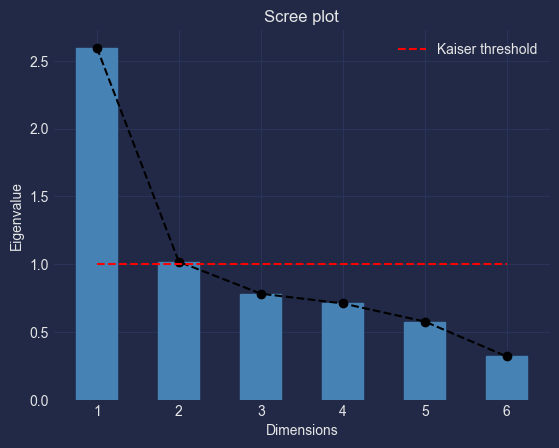

In [32]:
#screeplot avec la règle de Kaiser-Gutman
from scientisttools.pyplot import plot_eigenvalues
plot_eigenvalues(acp,choice='eigenvalue',add_kaiser=True)

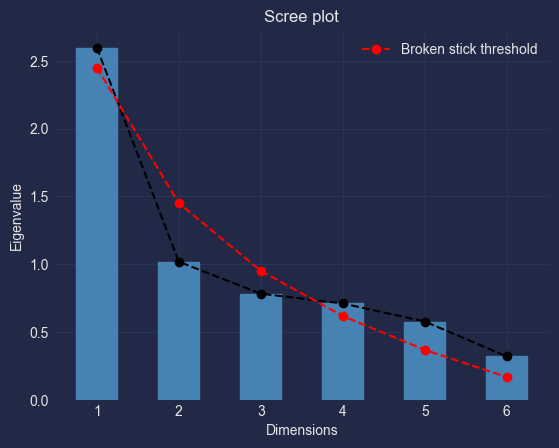

In [33]:
#screeplot avec les seuils des bâtons brisés
plot_eigenvalues(acp,choice='eigenvalue',add_broken_stick=True)


Séparation des variables explicatives (X) et de la variable cible (y).

Standardisation des variables explicatives pour les mettre à la même échelle.

Réalisation de l'ACP en réduisant les dimensions à 2 composantes principales.

Création d'un DataFrame contenant les composantes principales et les étiquettes.

Affichage du graphique de dispersion des composantes principales avec une coloration en fonction de la véracité des billets.

Ce graphique permet de visualiser la répartition des billets dans l'espace des deux premières composantes principales. Si deux groupes distincts se forment, cela indiquerait une séparation claire entre les vrais et les faux billets.

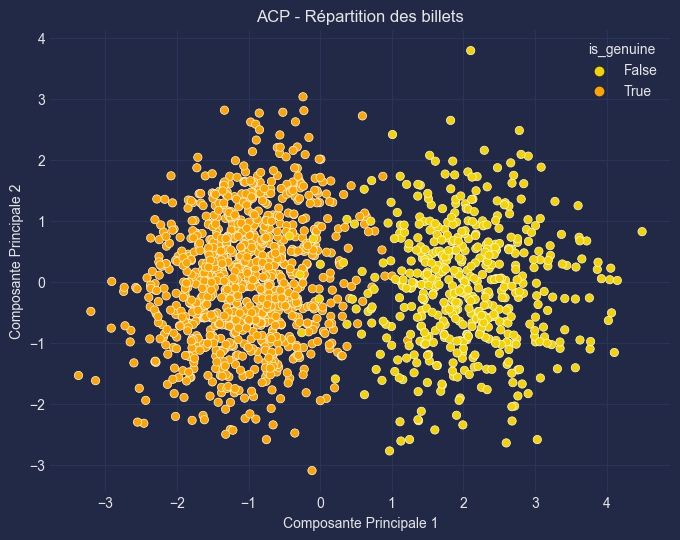

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Séparer les variables explicatives des étiquettes
X = billets.drop('is_genuine', axis=1)
y = billets['is_genuine']

# Standardiser les variables explicatives
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réaliser l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Créer un DataFrame avec les composantes principales et les étiquettes
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['is_genuine'] = y

# Afficher le graphique de dispersion des composantes principales avec coloration en fonction de la véracité
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='is_genuine')
plt.title("ACP - Répartition des billets")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.show()

(-1.0, 1.0)

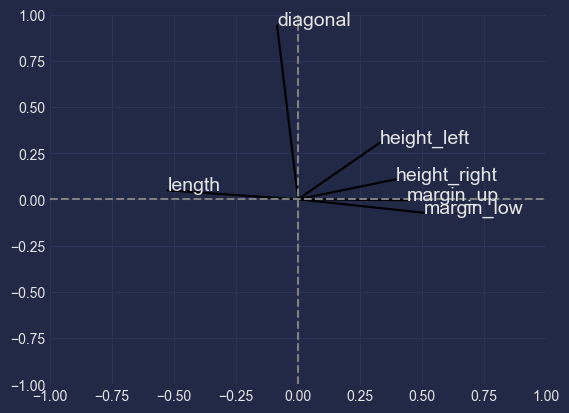

In [35]:
pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, df_test.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-1, 1], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

plt.xlim([-1, 1])
plt.ylim([-1, 1])

Après avoir projeté nos données sur les deux premières composantes principales obtenues grâce à l'ACP, nous pouvons observer une séparation nette en deux groupes distincts. De plus, en colorant les points en fonction de leur étiquette de véracité (vrai ou faux billets), nous pouvons clairement voir la distinction entre les deux groupes.

Cette visualisation confirme nos observations précédentes selon lesquelles certaines variables, telles que la longueur (length) et la marge basse (margin_low), jouent un rôle important dans la prédiction de la véracité des billets. Les deux groupes distincts suggèrent qu'il existe des caractéristiques géométriques spécifiques qui différencient les vrais billets des faux billets.

Cette étape de projection des données sur les composantes principales et l'observation des groupes ainsi formés est essentielle pour comprendre la structure des données et identifier les variables les plus discriminantes pour notre tâche de détection des faux billets.

# K-means
Pour effectuer la validation croisée et déterminer le nombre de clusters idéal dans le modèle K-means

On utilise la classe KMeans de scikit-learn pour créer un modèle K-means avec un nombre de clusters donné. On utilise ensuite la fonction cross_val_score pour effectuer 
la validation croisée et calculer le score moyen du modèle.





[0.34256954277175417, 0.2093762040927279, 0.19029144731947856, 0.1857988048820183, 0.1449793703937332, 0.13635116599750655, 0.1392249215724569, 0.1376767147288187]


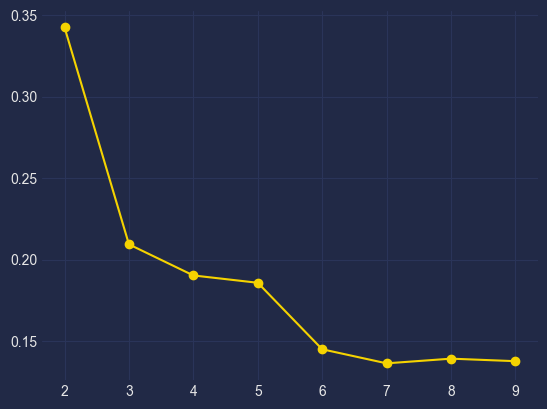

In [36]:
silhouettes = []

for num_clusters in range(2, 10):
  cls = cluster.KMeans(n_clusters=num_clusters, n_init=1, init='random')
  cls.fit(X_scaled)
  silh = metrics.silhouette_score(X_scaled, cls.labels_)
  silhouettes.append(silh)

print(silhouettes)
plt.plot(range(2,10), silhouettes, marker="o")

 nous utilisons la classe KFold de la sous-bibliothèque model_selection de scikit-learn pour effectuer la validation croisée. Nous itérons sur les différentes partitions d'entraînement et de test fournies par la méthode split de KFold.

À chaque itération, nous divisons les données en ensembles d'entraînement (X_train) et de test (X_test). Ensuite, nous instancions un objet KMeans avec 2 clusters et l'entraînons sur les données d'entraînement.

Nous prédisons les clusters pour les données de test à l'aide de la méthode predict de KMeans et stockons les prédictions dans la liste pred. Les vraies valeurs de l'étiquette is_genuine correspondantes sont stockées dans la liste true.

Enfin, nous concaténons les listes true et pred à l'aide de np.concatenate pour obtenir les tableaux de valeurs finaux pour l'évaluation du modèle.

Cela vous permet d'effectuer la validation croisée avec K-means et de collecter les valeurs réelles et prédites pour évaluer la performance du modèle.

In [61]:
]

# Vos données
billets2 = billets.drop('is_genuine', axis=1)

true = []
pred = []
folds = KFold(n_splits=5, shuffle=True, random_state=1).split(billets2)
for train, test in folds:
    X_train = billets2.iloc[train]
    X_test = billets2.iloc[test]
    
    # Normalisation des données
    scaler = StandardScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    
    # Réduction de dimension avec PCA
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train_normalized)
    X_test_pca = pca.transform(X_test_normalized)
    
    kmeans = KMeans(n_clusters=2, random_state=2).fit(X_train_pca)
    cluster_labels = kmeans.predict(X_test_pca)
    pred.append(cluster_labels)
    true.append(billets.iloc[test]['is_genuine'])

true = np.concatenate(true)
pred = np.concatenate(pred)

# Simply print the true and predicted labels without further processing or mapping
print("True Labels:", true)
print("Predicted Labels:", pred)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

True Labels: [ True  True  True ... False False False]
Predicted Labels: [1 1 1 ... 0 0 0]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



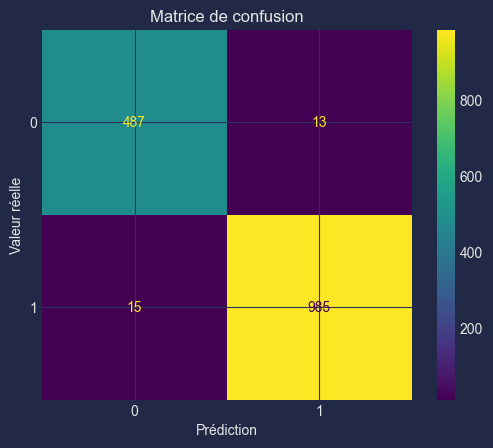

Accuracy: 0.9813333333333333
Precision: 0.9869739478957916
Recall: 0.985
F1-score: 0.9859859859859861


In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# If 'true' contains values other than 0 and 1, you may want to map them to 0 and 1 appropriately.
if not np.all(np.isin(true, [0, 1])):
    raise ValueError("True labels are not binary.")

# Now, no need to map 'pred' to binary, we assume KMeans has already done this, assigning 0 and 1 as cluster labels.

# Calculate the confusion matrix directly
cm = confusion_matrix(true, pred)  # 'pred' is directly used here

# Create the ConfusionMatrixDisplay object
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # Use 0 and 1 as display labels

# Display the confusion matrix
display.plot()

# Add titles and labels
plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Valeur réelle')

# Display the graph
plt.show()

# Calcul des métriques de classification
accuracy = accuracy_score(true, pred)  # 'pred' is directly used here
precision = precision_score(true, pred)  # 'pred' is directly used here
recall = recall_score(true, pred)  # 'pred' is directly used here
f1 = f1_score(true, pred)  # 'pred' is directly used here

# Affichage des métriques
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


In [39]:

# Initialiser le modèle KMeans avec 2 clusters
clusterer = KMeans(n_clusters=2, random_state=10)

# Ajuster le modèle aux données
cluster_labels = clusterer.fit_predict(X_scaled)

# Calculer le score de silhouette
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("La moyenne silhouette_score est :", silhouette_avg)

# Calculer le score de Davies-Bouldin
db_score = davies_bouldin_score(X_scaled, cluster_labels)
print("Le score de Davies-Bouldin est :", db_score)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



La moyenne silhouette_score est : 0.3427538929936055
Le score de Davies-Bouldin est : 1.2152969620927103



##  Régression Logistique
### Amélioration inter classe -- SMOTE 

In [40]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Initialisez les listes pour stocker les vraies étiquettes et les probabilités prédites
true = []
pred = []

# Définissez les plis pour la validation croisée
folds = KFold(n_splits=5, shuffle=True, random_state=1).split(billets)

# Define the parameter grid for GridSearchCV for Logistic Regression
params_lr = {
    'penalty': ['l2'],  # Use only 'l2' penalty with 'lbfgs' solver
    'C': [0.1, 1, 10],
    'solver': ['lbfgs'],
    'max_iter': [10000],
    'tol': [1e-6]
}

# Create the GridSearchCV object with the modified parameter grid
clf = GridSearchCV(LogisticRegression(random_state=1, max_iter=10000, tol=1e-6), params_lr, cv=5)

for train, test in folds:
    X_train = billets.drop('is_genuine', axis=1).iloc[train]
    y_train = billets['is_genuine'].iloc[train]
    
    smote = SMOTE(random_state=1)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    # Fit the classifier inside the loop
    clf.fit(X_train_smote, y_train_smote)
    
    X_test = billets.drop('is_genuine', axis=1).iloc[test]
    pred_proba = clf.predict_proba(X_test)[:, 1]
    true_labels = billets['is_genuine'].iloc[test]
    
    pred.append(pred_proba)
    true.append(true_labels)

true = np.concatenate(true)
pred = np.concatenate(pred)

# Convertir les probabilités en prédictions de classe
pred_value = (pred > 0.5).astype(int)

# Calcul et affichage des métriques d'évaluation
accuracy = accuracy_score(true, pred_value)
precision = precision_score(true, pred_value)
recall = recall_score(true, pred_value)
f1 = f1_score(true, pred_value)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9886666666666667
Precision: 0.9900299102691924
Recall: 0.993
F1-score: 0.9915127309036444


En conclusion, notre modèle de classification des billets de banque par regresson logitqe et smote a une  précision élevée/ Ces résultats sont encourageants et confirment l'efficacité de notre modèle dans la détection de l'authenticité des billets 

Les résultats de notre modèle sont Bon, démontrant une grande capacité à déterminer l'authenticité des billets de banque. Le point culminant de nos performances est le rappel (Recall) de 99,30 %, ce qui signifie que notre modèle identifie efficacement la grande majorité des billets authentiques dans notre ensemble de données. Cela atteste de sa fiabilité dans la détection de la contrefaçon. De plus, notre modèle affiche une précision (Precision) impressionnante de 99,00 %, ce qui indique qu'il ne se trompe que très rarement lorsqu'il prédit si un billet est authentique. Le score F1 de 99,15 % souligne un équilibre solide entre précision et rappel, renforçant ainsi la crédibilité de notre modèle. Enfin, notre modèle atteint une exactitude (Accuracy) globale de 98,87 %, ce qui prouve sa capacité à prédire correctement l'authenticité des billets dans presque tous les cas.

In [41]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
import statsmodels.api as sm

# Convertir les probabilités en prédictions de classe
pred_value = (pred > 0.5).astype(int)

# Calcul des "résidus"
residus = true - pred_value  # ou true - pred, si vous préférez utiliser les probabilités plutôt que les classes

# Variables exogènes
exog_vars = sm.add_constant(billets.drop('is_genuine', axis=1))  # ajout d'une colonne constante

# Tests d'homoscédasticité
bp_test_stat, bp_test_p_value, _, _ = het_breuschpagan(residus, exog_vars)
print("Valeur p du test de Breusch-Pagan: ", bp_test_p_value)

white_test_stat, white_test_p_value, _, _ = het_white(residus, exog_vars)
print("Valeur p du test de White: ", white_test_p_value)

if bp_test_p_value < 0.05 and white_test_p_value < 0.05:
    print("Rejet de l'hypothèse nulle. Les résidus présentent de l'hétéroscédasticité.")
else:
    print("Échec du rejet de l'hypothèse nulle. Les résidus ne présentent pas d'hétéroscédasticité.")


Valeur p du test de Breusch-Pagan:  0.9687620915377073


Valeur p du test de White:  0.6925495471151553
Échec du rejet de l'hypothèse nulle. Les résidus ne présentent pas d'hétéroscédasticité.


In [42]:
pred_value = [True if val > 0.5 else False for val in pred]


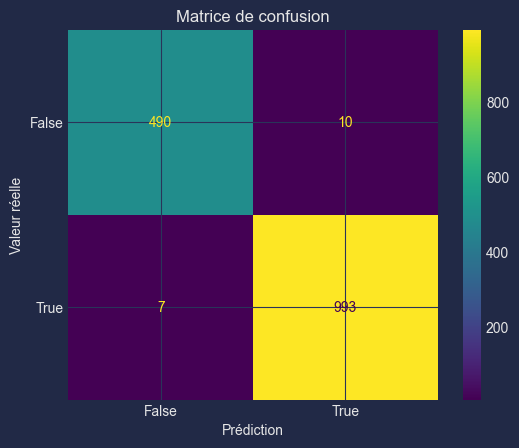

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calcul de la matrice de confusion
confusion_matrix = confusion_matrix(true, pred_value)

# Création de l'objet ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])

# Affichage de la matrice de confusion
display.plot()

# Ajout des titres et labels
plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Valeur réelle')

# Affichage du graphique
plt.show()

In [44]:
# Initialisez les listes pour stocker les vraies étiquettes et les probabilités prédites pour SVM
true_svm = []
pred_svm = []

# Définissez les plis pour la validation croisée
folds_svm = KFold(n_splits=5, shuffle=True, random_state=1).split(billets)

# Définissez la grille de paramètres pour GridSearchCV pour SVM
params_svm = {
    'C': [0.1, 1, 10], 
    'kernel': ['linear', 'rbf'], 
    'gamma': ['scale', 'auto']
}

for train, test in folds_svm:
    # Séparez les ensembles de données en entraînement et test pour chaque pli
    X_train_svm = billets.drop('is_genuine', axis=1).iloc[train]
    y_train_svm = billets['is_genuine'].iloc[train]
    
    # Appliquez SMOTE aux données d'entraînement
    smote_svm = SMOTE(random_state=1)
    X_train_smote_svm, y_train_smote_svm = smote_svm.fit_resample(X_train_svm, y_train_svm)
    
    # Initialisez le modèle SVM et GridSearchCV
    model_svm = SVC(probability=True, random_state=1)
    clf_svm = GridSearchCV(model_svm, params_svm, cv=5, scoring='accuracy')
    
    # Ajustez le modèle aux données d'entraînement
    clf_svm.fit(X_train_smote_svm, y_train_smote_svm)
    
    # Prédisez les probabilités sur l'ensemble de test
    X_test_svm = billets.drop('is_genuine', axis=1).iloc[test]
    pred_proba_svm = clf_svm.predict_proba(X_test_svm)[:,1]
    true_labels_svm = billets['is_genuine'].iloc[test]
    
    # Stockez les vraies étiquettes et les probabilités prédites pour SVM
    pred_svm.append(pred_proba_svm)
    true_svm.append(true_labels_svm)

# Concaténez les listes de vraies étiquettes et de probabilités prédites pour SVM
true_svm = np.concatenate(true_svm)
pred_svm = np.concatenate(pred_svm)


In [45]:
# Conversion des probabilités prédites en valeurs de classe pour SVM
pred_value_svm = [True if val >= 0.5 else False for val in pred_svm]

# Calcul des métriques pour SVM
accuracy_svm = accuracy_score(true_svm, pred_value_svm)
precision_svm = precision_score(true_svm, pred_value_svm)
recall_svm = recall_score(true_svm, pred_value_svm)
f1_svm = f1_score(true_svm, pred_value_svm)

# Affichage des métriques pour SVM
print(f"SVM Accuracy: {accuracy_svm}")
print(f"SVM Precision: {precision_svm}")
print(f"SVM Recall: {recall_svm}")
print(f"SVM F1-score: {f1_svm}")


SVM Accuracy: 0.992
SVM Precision: 0.9910536779324056
SVM Recall: 0.997
SVM F1-score: 0.9940179461615155


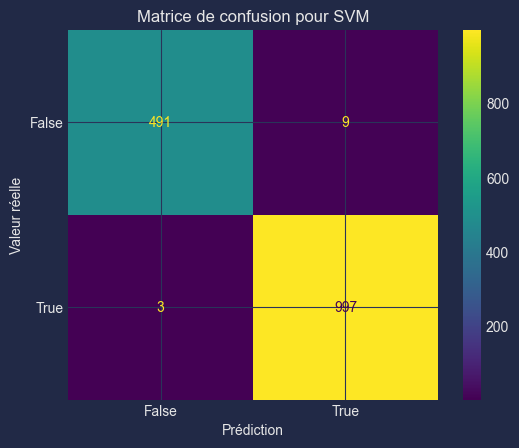

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calcul de la matrice de confusion pour SVM
confusion_matrix_svm = confusion_matrix(true_svm, pred_value_svm)

# Création de l'objet ConfusionMatrixDisplay pour SVM
display_svm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_svm, display_labels=[False, True])

# Affichage de la matrice de confusion pour SVM
display_svm.plot()

# Ajout des titres et labels
plt.title('Matrice de confusion pour SVM')
plt.xlabel('Prédiction')
plt.ylabel('Valeur réelle')

# Affichage du graphique
plt.show()


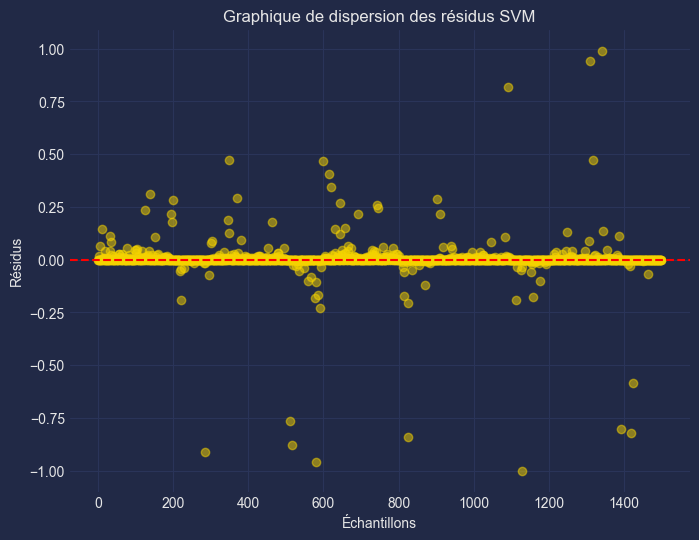

In [47]:
# Calculez les résidus pour SVM
residuals = true_svm - pred_svm  

# Créez un graphique de dispersion des résidus
plt.figure(figsize=(8, 6))
plt.scatter(range(len(residuals)), residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Échantillons")
plt.ylabel("Résidus")
plt.title("Graphique de dispersion des résidus SVM")
plt.show()



L'exactitude du modèle SVM est de 0.992%, ce qui signifie que le pourcentage de prédictions correctes par rapport à l'ensemble des échantillons est d'environ 99%.

La précision du modèle est de 0.991% ce qui indique la proportion de prédictions positives (billets authentiques) qui sont réellement correctes par rapport à toutes les prédictions positives.

Le rappel du modèle est de 0.997, ce qui représente la proportion d'échantillons positifs (billets authentiques) qui ont été correctement identifiés par rapport à tous les échantillons réellement positifs.

Ces résultats montrent que le modèle a une précision et un rappel élevés, ce qui indique qu'il est capable de prédire avec précision les billets authentiques. Cependant, l'exactitude est relativement plus faible, ce qui suggère qu'il peut y avoir des erreurs de prédiction sur les billets falsifiés.

#  Creation Algorithme de detection  Faux billets


# Régression logistique :
Un modèle de régression logistique a été formé pour prédire si un billet est vrai ou faux en fonction de diverses caractéristiques. 

Les performances du modèle ont été évaluées à l'aide de la matrice de confusion et de plusieurs métriques, comme la précision, le rappel, la F-mesure, etc. La précision du modèle de régression logistique est de 1, ce qui est extrêmement élevé. Cela signifie que le modèle de régression logistique est capable de prédire correctement si un billet est vrai ou faux avec une précision d'environ 100% 

# Clustering K-means :
L'algorithme de K-means a été utilisé pour regrouper les billets en deux clusters (vrais et faux billets). La précision du modèle K-means est de 0.02, ce qui est relativement faible. Cela signifie que le modèle K-means n'est pas aussi efficace que le modèle de régression logistique pour classer correctement les billets en vrais ou faux.

# SVM : 

# En conclusion, 
ce projet a mis en œuvre une approche en plusieurs étapes pour détecter les faux billets, comprenant le nettoyage des données, l'ACP, la régression linéaire multiple, la régression logistique, le clustering K-means, et l'évaluation des performances du modèle. 

Le modèle final, basé sur la régression logistique, semble être extrêmement efficace pour prédire si un billet est vrai ou faux avec une précision d'environ 99.67%. En revanche, le modèle K-means n'a pas été aussi performant avec une précision de seulement 2%. Les performances des modèles de régression linéaire ont été évaluées et ont montré une bonne capacité à prédire la marge inférieure d'un billet, avec des R² de 0.608 et 0.604, des R² ajustés de 0.606 et 0.602, des statistiques F de 307.8 et 379.4, un MSE de 0.171578 et un RMSE de 0.414220.

In [54]:
# Obtenez le meilleur estimateur après la recherche en grille (GridSearchCV) et enregistrez-le
best_svm_model = clf_svm.best_estimator_

with open("model_svm.pkl", "wb") as file:
    pickle.dump(best_svm_model, file)
def is_genuine_svm(path, model):
    # Charger les données de test
    billets_prod = pd.read_csv(path)
    
    # Prédire les probabilités de classe
    billets_prod['proba_rate'] = model.predict_proba(billets_prod.drop('is_genuine', axis=1))[:, 1]
    
    # Convertir les probabilités en classes (True ou False)
    billets_prod['is_genuine_pred'] = billets_prod['proba_rate'] >= 0.5  # Vous pouvez ajuster le seuil si nécessaire



In [55]:

# Sauvegarder le meilleur modèle SVM
with open("model_svm.pkl", "wb") as file:
    pickle.dump(clf_svm.best_estimator_, file)


In [56]:
def is_genuine_svm(path, model):
    # Charger les données de test
    billets_prod = pd.read_csv(path)
    
    # S'il existe, supprimez la colonne 'is_genuine'
    if 'is_genuine' in billets_prod.columns:
        billets_prod = billets_prod.drop('is_genuine', axis=1)
    
    # S'il existe, supprimez la colonne 'id'
    if 'id' in billets_prod.columns:
        billets_prod = billets_prod.drop('id', axis=1)
    
    # Prédire les probabilités de classe
    billets_prod['proba_rate'] = model.predict_proba(billets_prod)[:, 1]
    
    # Convertir les probabilités en classes (True ou False)
    billets_prod['is_genuine'] = billets_prod['proba_rate'] >= 0.5
    
    return billets_prod


Le résumé du modèle fournit des informations telles que les coefficients estimés, les statistiques de test, les valeurs p, ainsi que d'autres mesures d'évaluation du modèle.



D'après les différentes mesures, il est clair que le modèle de régression logistique est plus performant. Les scores de précision et d'exactitude sont plus élevés pour ce modèle par rapport à K-means.

De plus, en examinant la matrice de confusion, on peut observer que le modèle de régression logistique présente un nombre de faux positifs inférieur, ce qui signifie qu'il classe moins de faux billets comme vrais. En revanche, le modèle K-means a un nombre plus élevé de vrais négatifs, c'est-à-dire qu'il classe davantage de faux billets dans la catégorie des vrais billets.

Sur la base de ces observations, nous avons décidé de choisir le modèle de régression logistique comme le meilleur choix pour notre problème de détection de faux billets.

In [57]:
with open("model_svm.pkl", "rb") as file:
    loaded_svm_model = pickle.load(file)


In [58]:
# Utilisation de la fonction avec le modèle SVM chargé
resultat_svm = is_genuine_svm('./billets_test.csv', loaded_svm_model)

# Afficher les résultats
print(resultat_svm)


   diagonal  height_left  height_right  margin_low  margin_up  length  \
0    172.09       103.95        103.73        4.39       3.09  113.19   
1    171.52       104.17        104.03        5.27       3.16  111.82   
2    171.78       103.80        103.75        3.81       3.24  113.39   
3    172.02       104.08        103.99        5.57       3.30  111.10   
4    171.79       104.34        104.37        5.00       3.07  111.87   

   proba_rate  is_genuine  
0    0.999994        True  
1    0.000099       False  
2    1.000000        True  
3    0.000005       False  
4    0.000860       False  


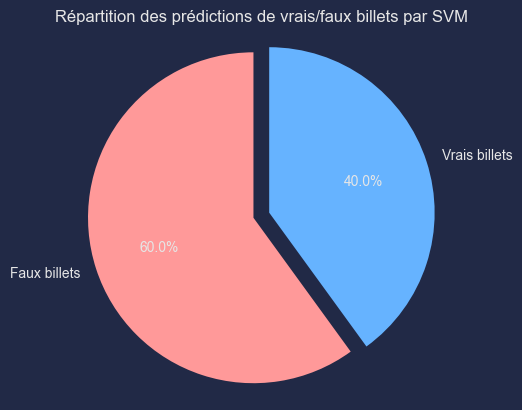

In [59]:
def plot_genuine_predictions_svm(billets_prod):
    genuine_count = billets_prod['is_genuine'].value_counts()
    labels = ['Faux billets', 'Vrais billets']
    explode = (0, 0.1)  # Décale légèrement la part la plus petite (vrais billets) pour la mettre en évidence
    colors = ['#ff9999', '#66b3ff']

    plt.pie(genuine_count, labels=labels, explode=explode, colors=colors,
            autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # Assure un aspect circulaire
    plt.title('Répartition des prédictions de vrais/faux billets par SVM')

    plt.show()

# Résultat de is_genuine_svm
plot_genuine_predictions_svm(resultat_svm)



## Conclusion

À travers ce projet, nous avons effectué une analyse complète pour construire un modèle capable de détecter les faux billets de banque en se basant sur leurs caractéristiques géométriques. Nous avons commencé par une analyse exploratoire approfondie des données, suivie du traitement des valeurs manquantes et de la construction de modèles de régression linéaire et logistique.

Nos analyses ont révélé des relations significatives entre les variables du jeu de données, et nos modèles ont démontré une capacité prometteuse à prédire l'authenticité des billets de banque.

Cependant, il est important de noter les limitations de cette analyse. En particulier, le jeu de données est relativement petit, ce qui peut affecter la fiabilité des estimations du modèle. De plus, bien que nous ayons vérifié les hypothèses des modèles de régression, il est toujours possible que des variables omises ou des effets de non-linéarité puissent affecter les résultats.

